In [6]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import keras
import tensorflow

from keras.models import Sequential
from keras.layers import Dense, Dropout

In [3]:
pip install scikeras

In [22]:
!pip show keras

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [4]:
!pip install keras

In [5]:
import keras
print(keras.__version__)

2.15.0


In [6]:
import os
print(os.environ['PYTHONPATH'])

/env/python


In [7]:
!pip install tensorflow-estimator

In [13]:
!pip install tensorflow==2.8

In [1]:

!pip install tensorflow==2.10.1

In [15]:
!pip install tensorflow-estimator

In [21]:
!pip install tensorflow==2.12

In [2]:
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


In [3]:
from keras.wrappers.scikit_learn import KerasRegressor

In [7]:
data = pd.read_csv('gas_turbines.csv')

In [8]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [10]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [11]:
data.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

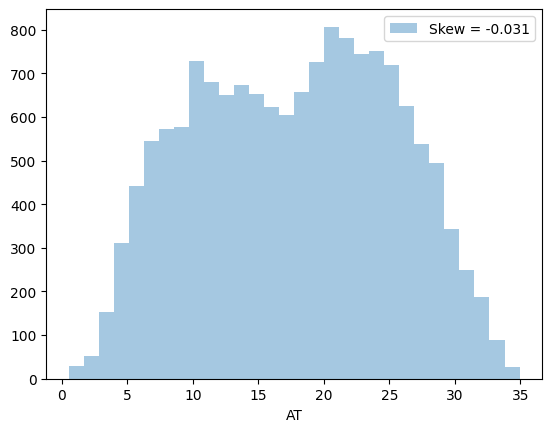

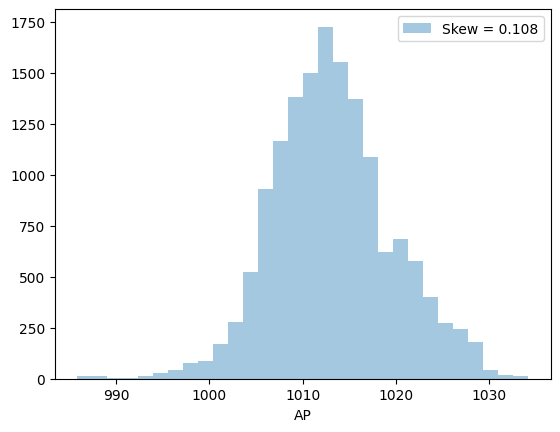

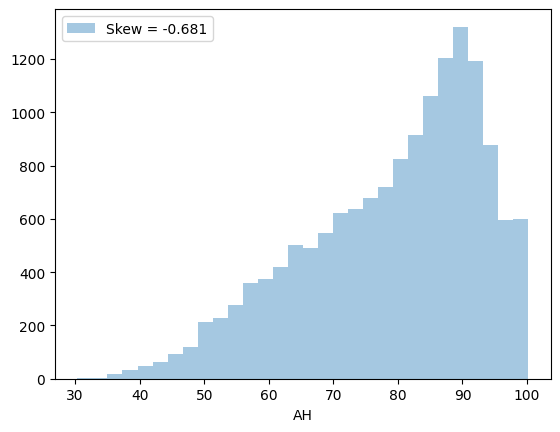

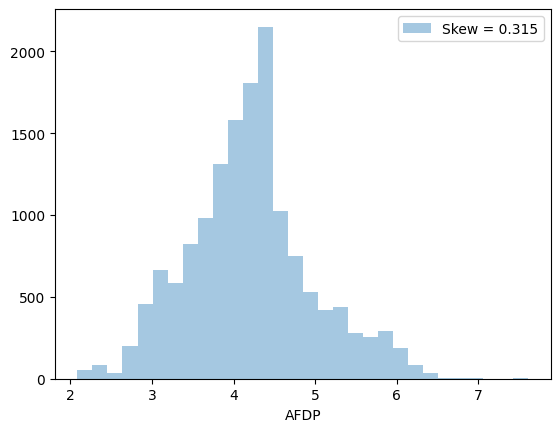

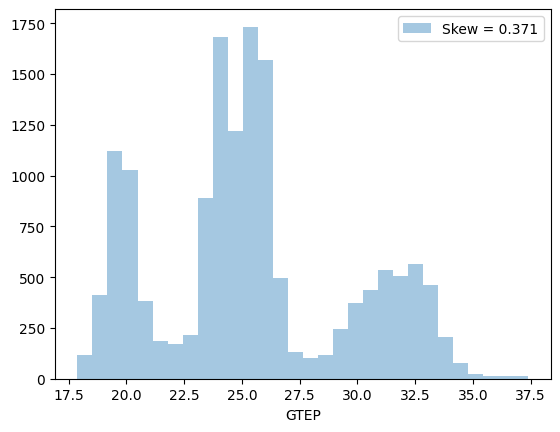

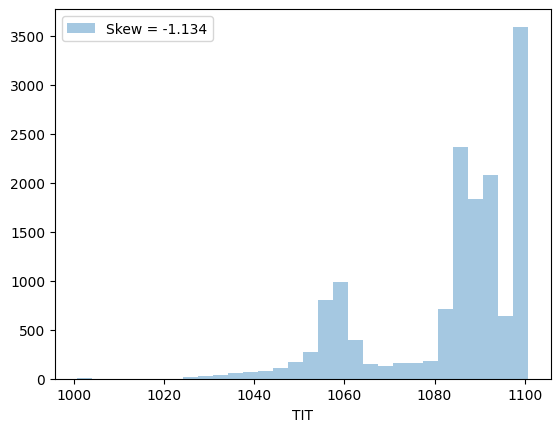

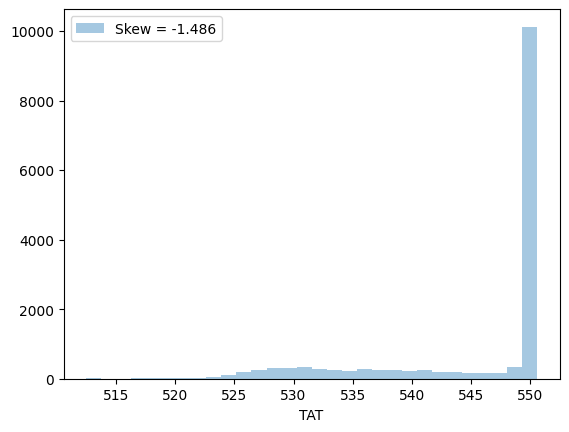

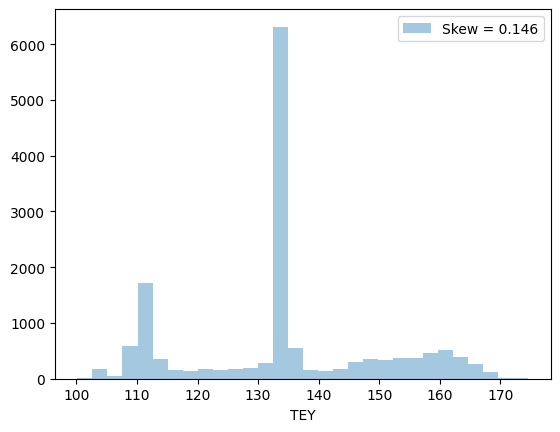

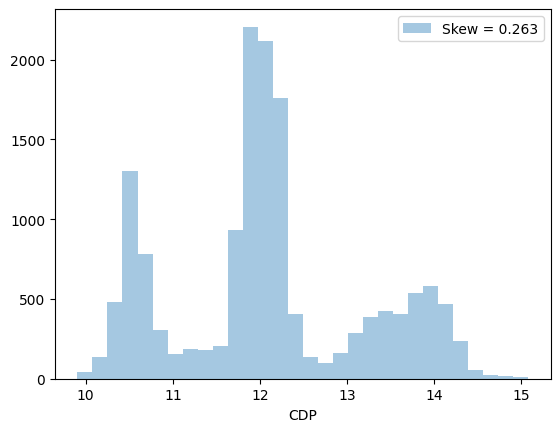

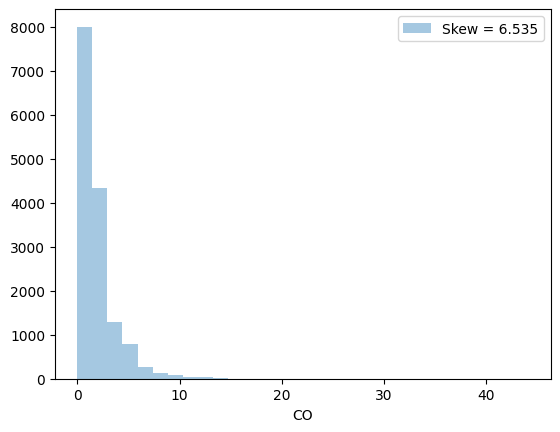

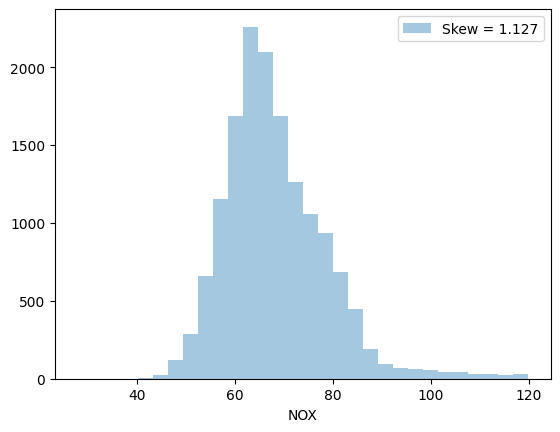

In [13]:
numerical_features=[feature for feature in data.columns if data[feature].dtypes != 'O']
for feat in numerical_features:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

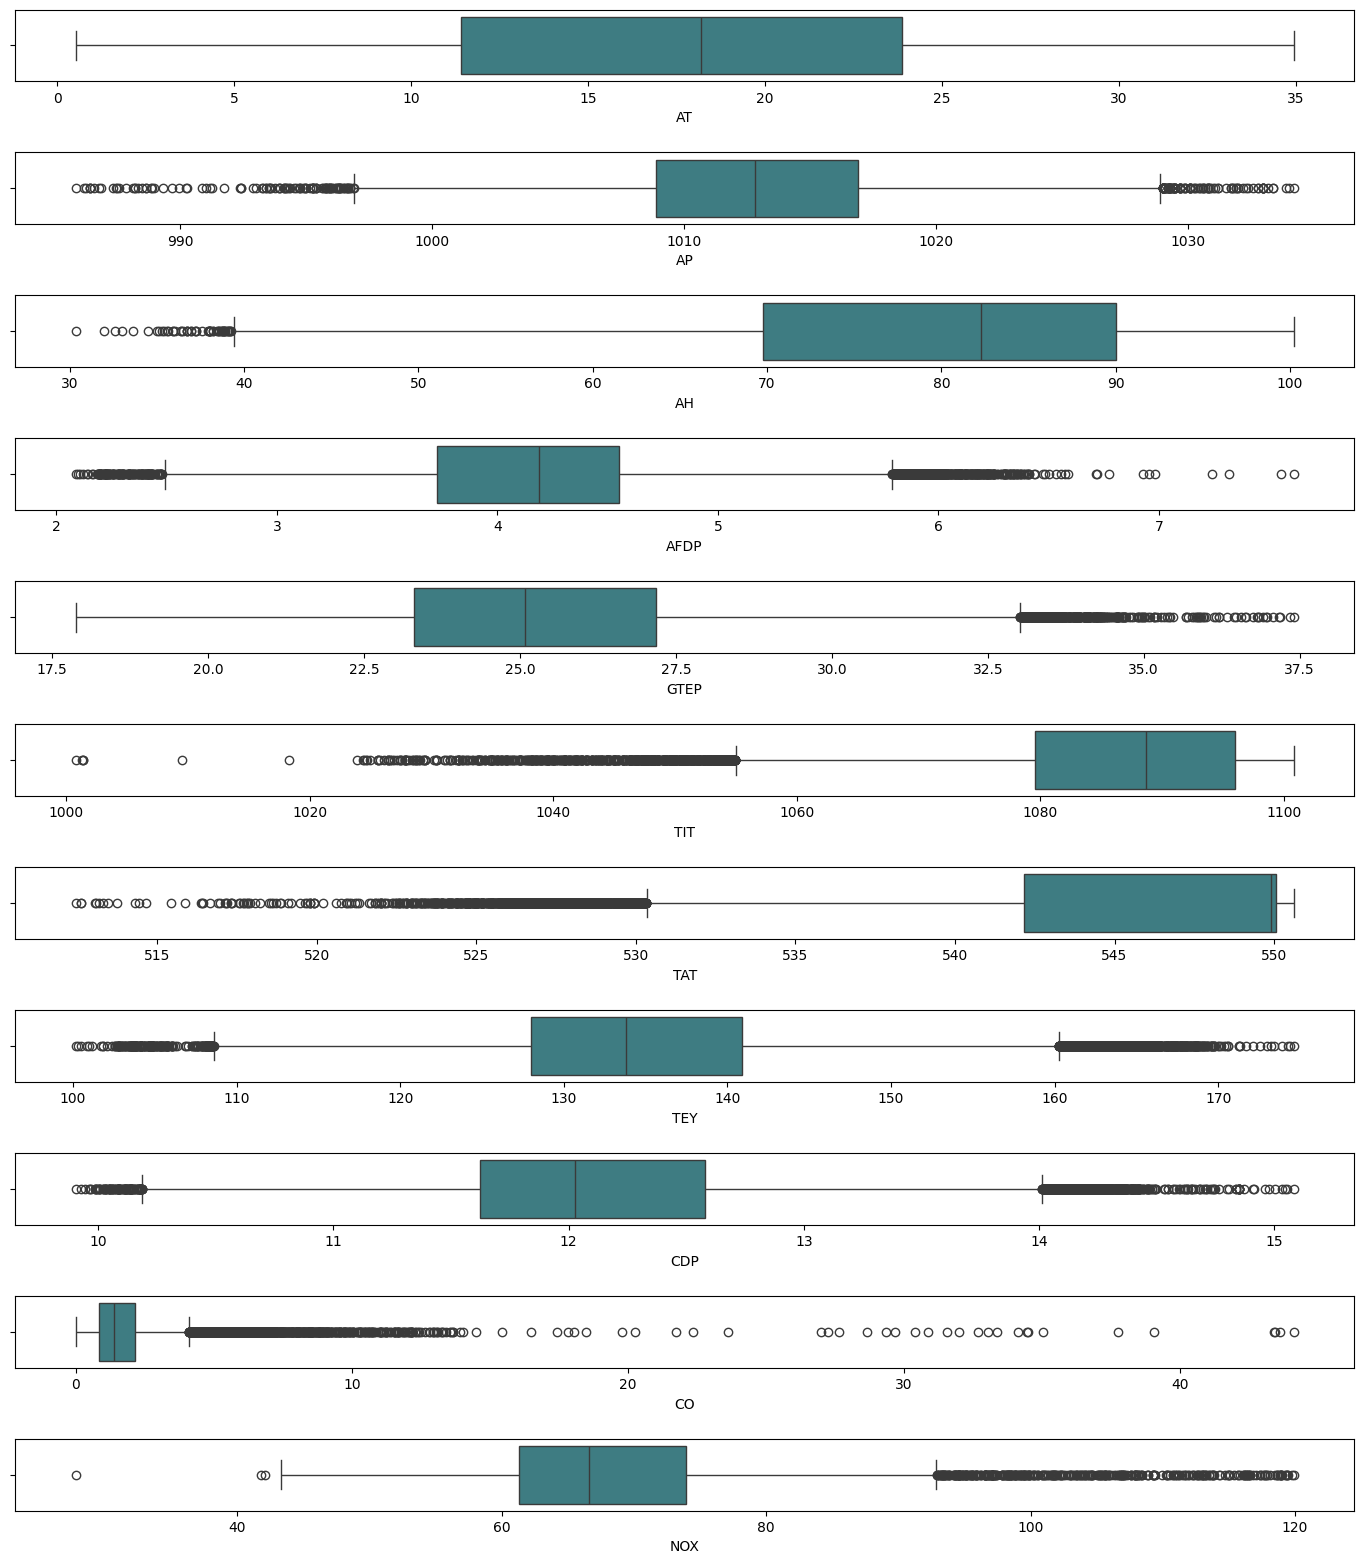

In [14]:
ot=data.copy()
fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data=ot,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

<Axes: >

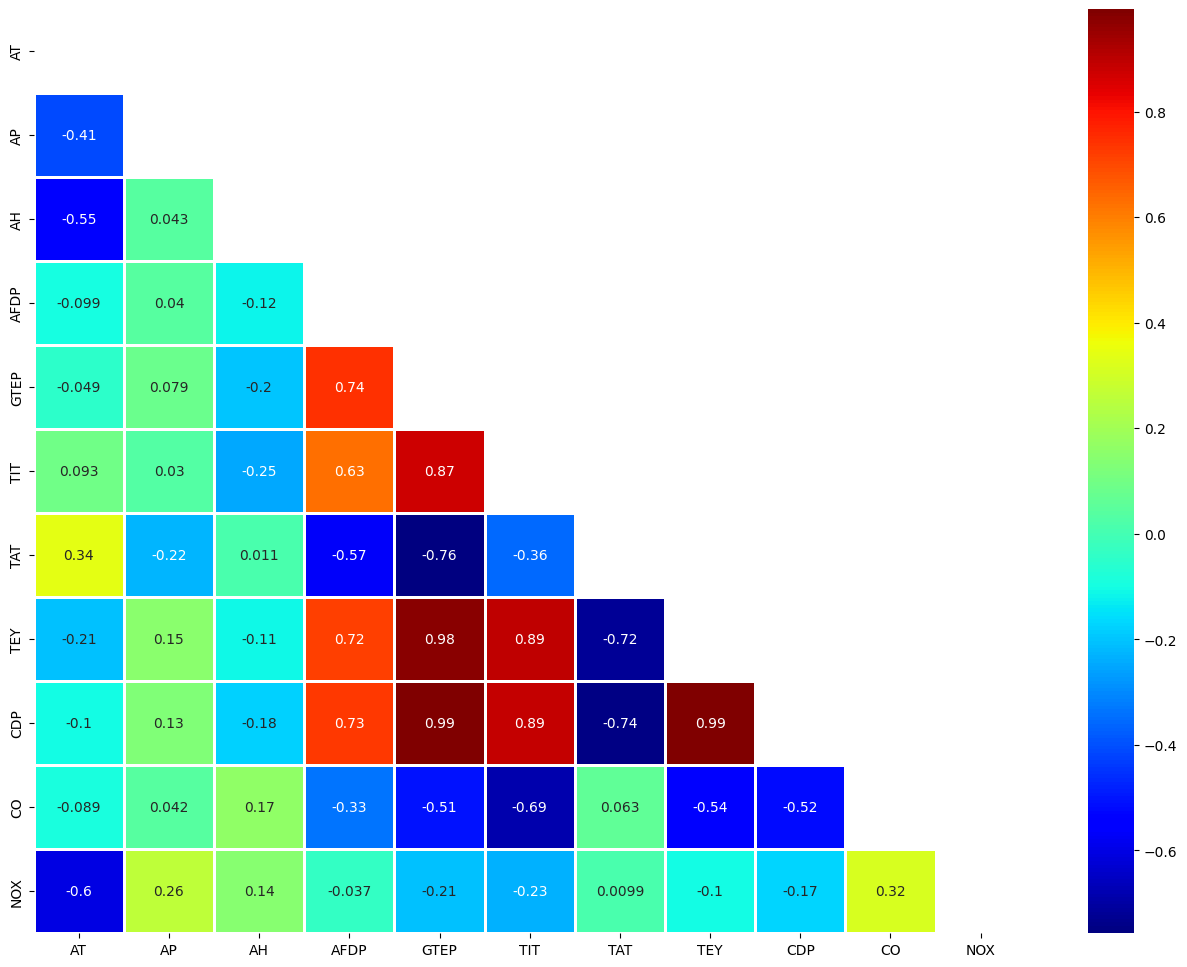

In [15]:
plt.figure(figsize=(16,12))
mask = np.zeros_like(data.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=data.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

In [16]:
x = data.iloc[:, [0, 1, 2, 3, 4, 5, 7, 8, 9, 10]].values
y=data.iloc[:,7]

In [17]:
x

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [18]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

Text(0.5, 1.0, 'Histogram of the Target Column')

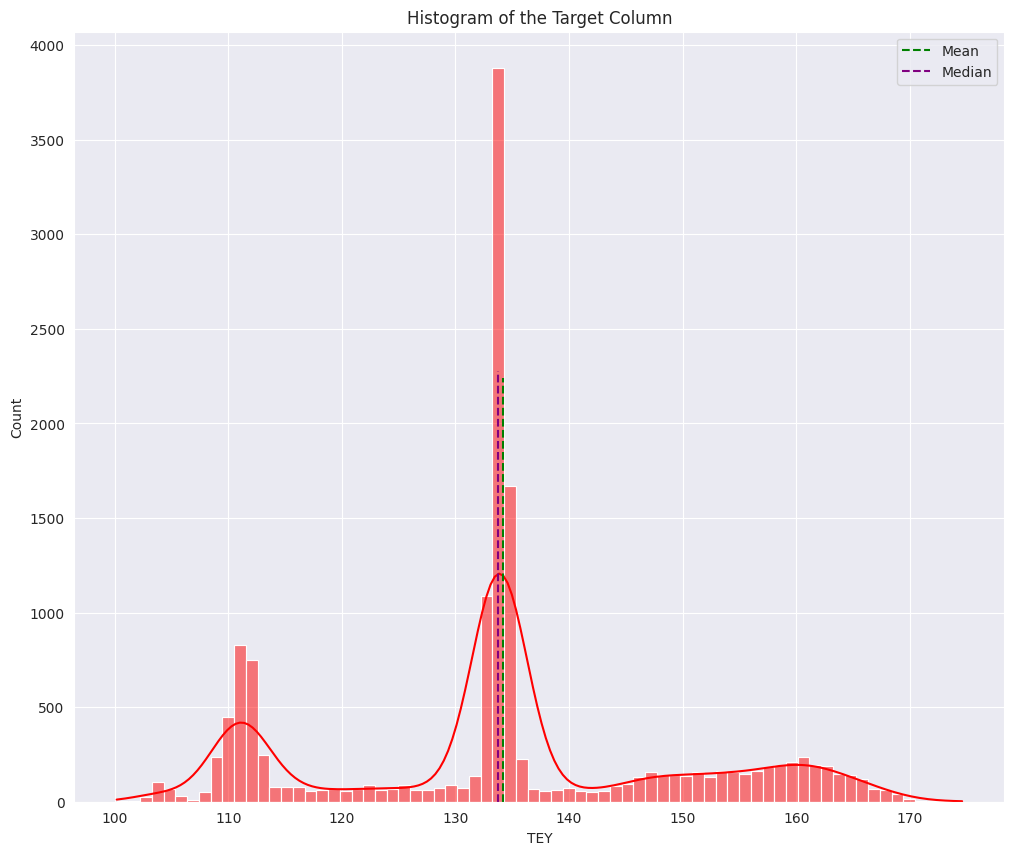

In [19]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.histplot(data=data,x="TEY",color="red",kde=True)
plt.axvline(x=data["TEY"].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=data["TEY"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")

Text(0.5, 1.0, 'Cumulative of the Target Column')

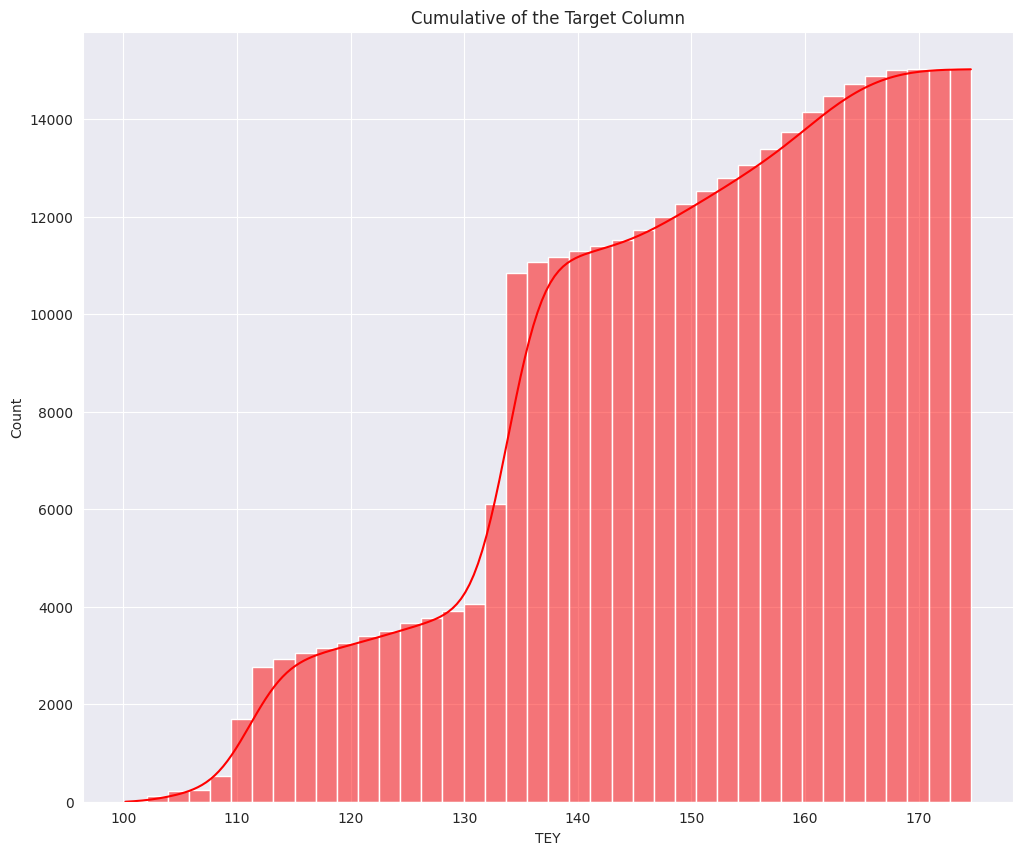

In [20]:
plt.figure(figsize = (12,10))
sns.histplot(data["TEY"],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")

Multivariate Analysis
Let's now proceed by drawing a pairplot to visually examine the correlation between the features.

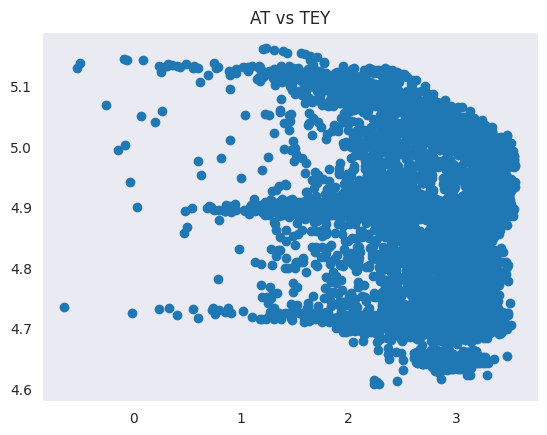

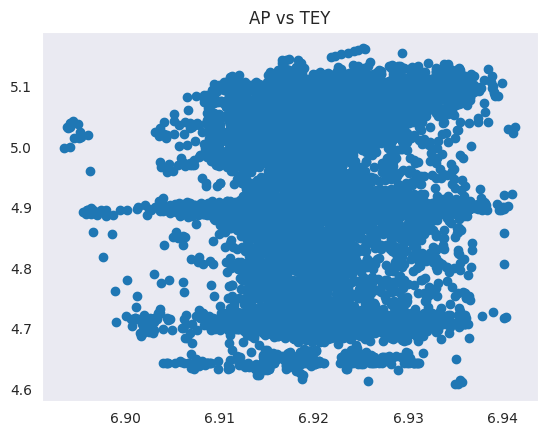

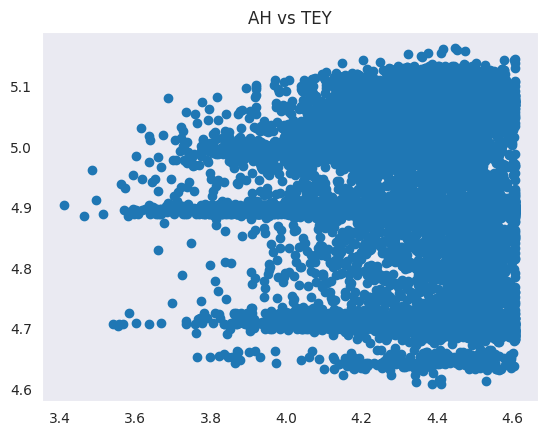

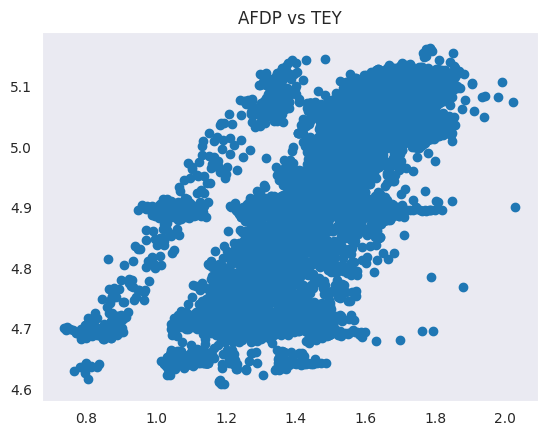

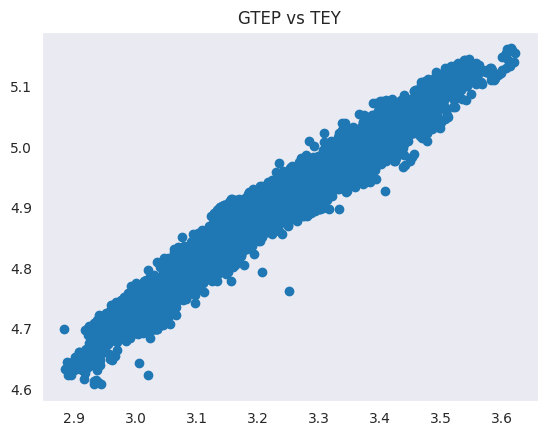

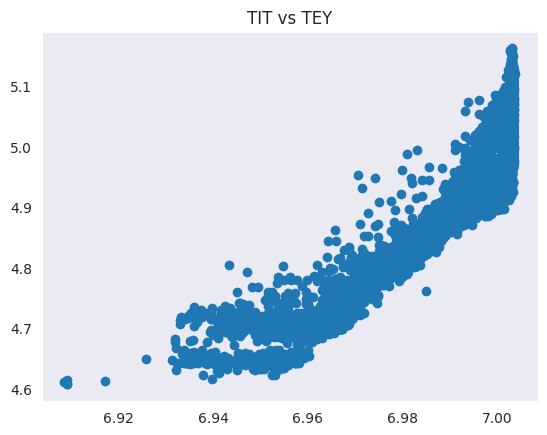

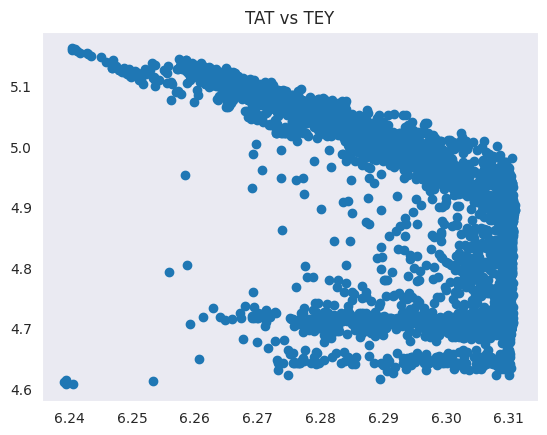

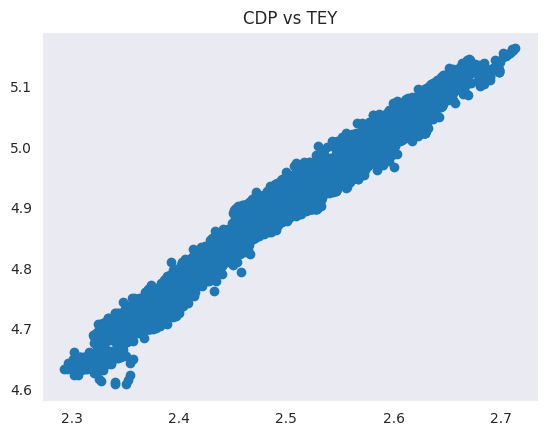

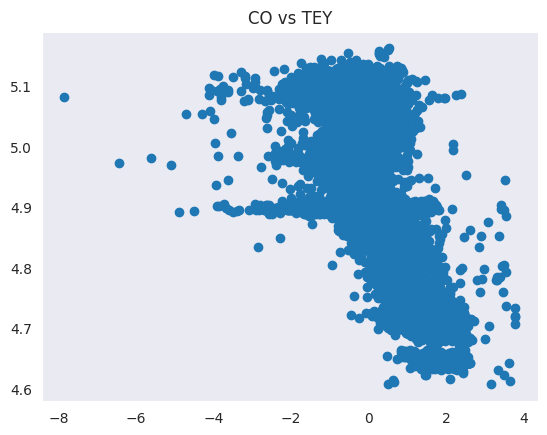

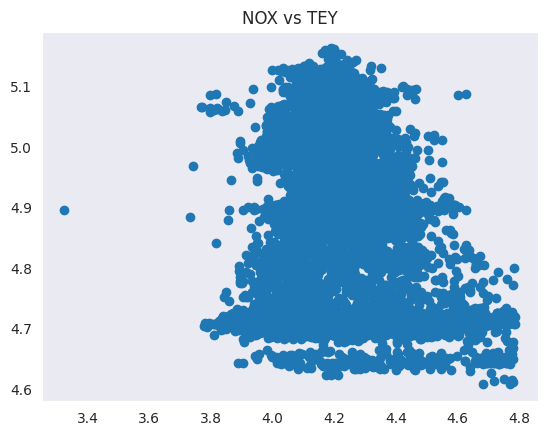

In [21]:
for i in data.columns:
    if i!="TEY":
        plt.scatter(np.log(data[i]), np.log(data['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

In [22]:
x = data.drop('TEY', axis=1)
y = data[["TEY"]]

Text(0.5, 1.0, 'Correlation with Turbine energy yield \n')

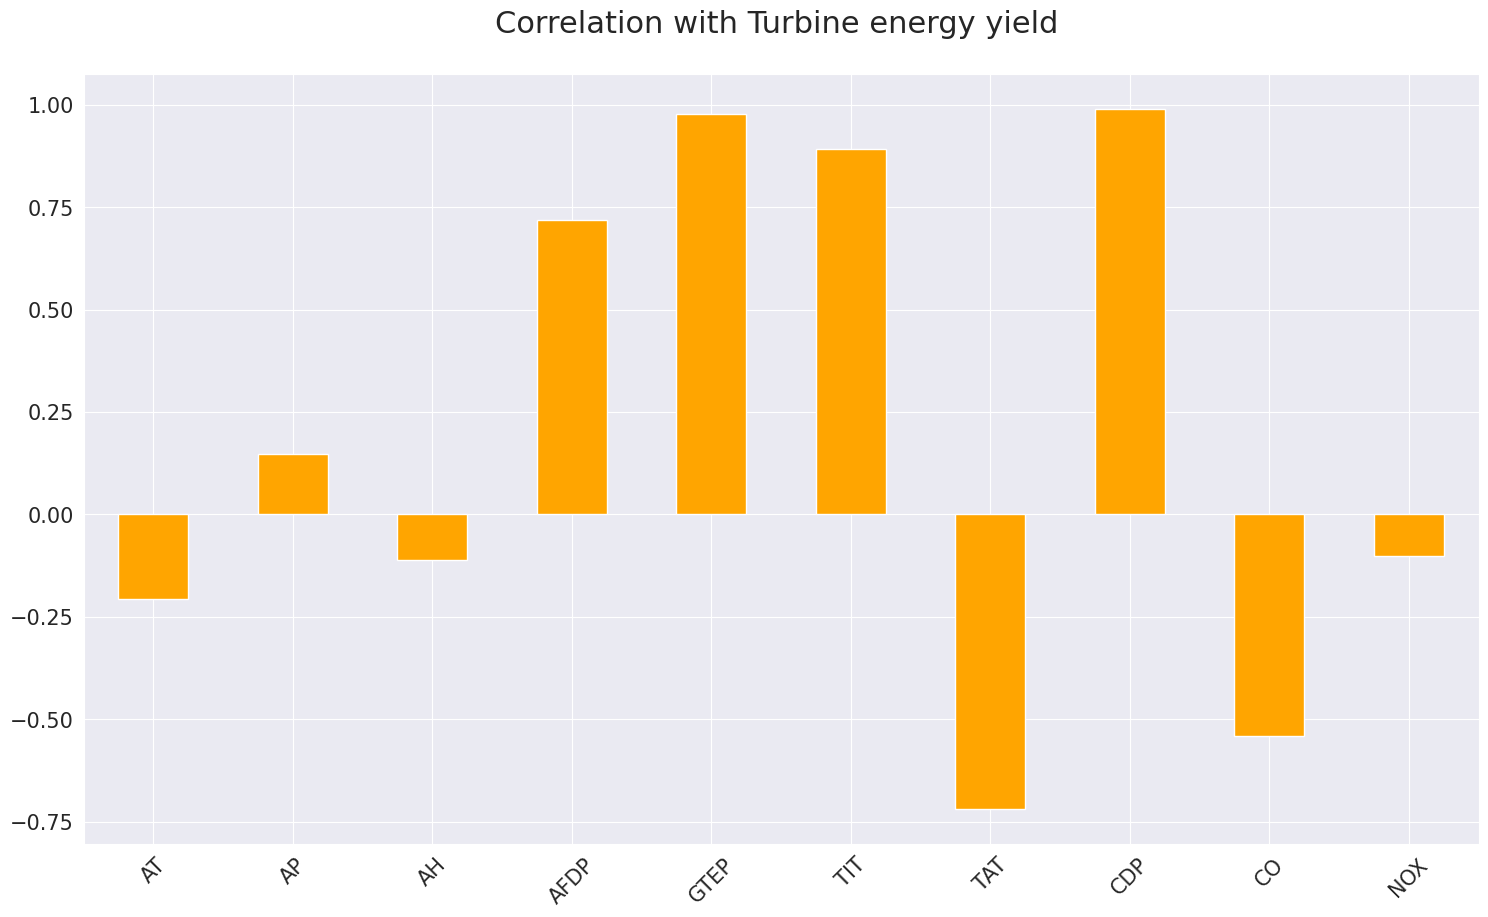

In [23]:
data2 = data.copy()

correlations = data2.corrwith(data.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

Feature Selection Technique

In [24]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest,mutual_info_regression


In [25]:
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)

In [26]:
# summarize scores
scores = fit.scores_

features = fit.transform(x)

In [27]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,1.714065,CDP
4,1.600231,GTEP
5,1.325887,TIT
6,0.892324,TAT
3,0.660968,AFDP
8,0.512005,CO
0,0.412809,AT
9,0.300885,NOX
1,0.140027,AP
2,0.097533,AH


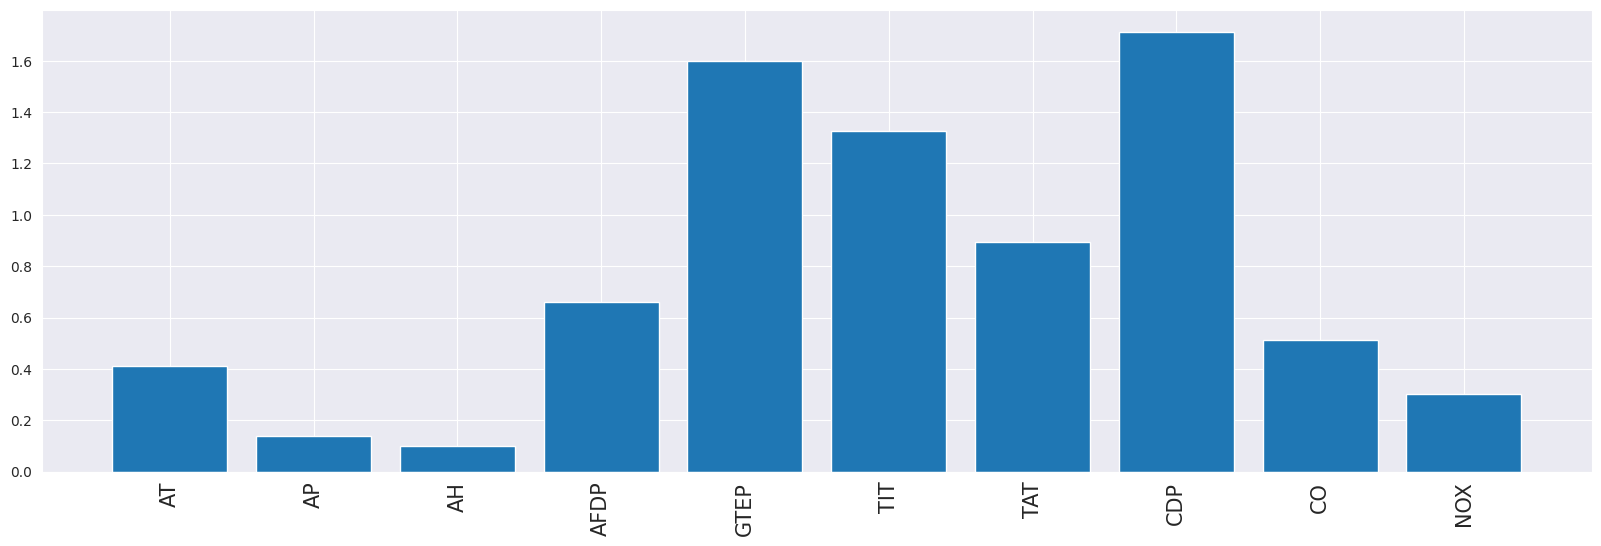

In [28]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

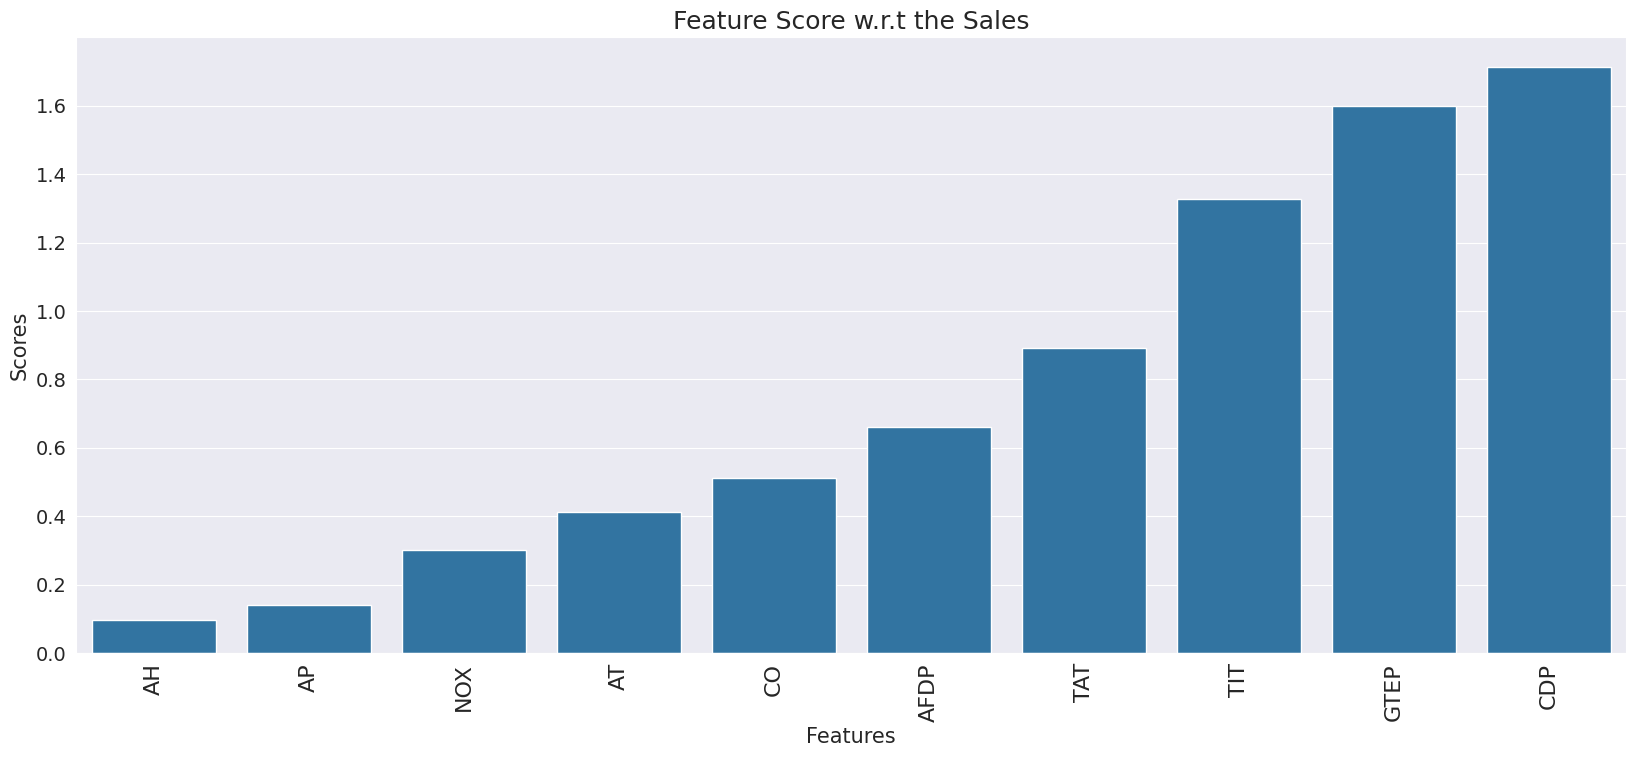

In [29]:
plt.figure(figsize=(20,8))
sns.barplot(x='Feature',
            y="Score",
            data=score_df,
            order=score_df.sort_values('Score').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [30]:
score_df.sort_values('Score',ascending=False)

,Score,Feature
7,1.714065,CDP
4,1.600231,GTEP
5,1.325887,TIT
6,0.892324,TAT
3,0.660968,AFDP
8,0.512005,CO
0,0.412809,AT
9,0.300885,NOX
1,0.140027,AP
2,0.097533,AH


In [31]:
model_data = data[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


In [32]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [33]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778,-1.231172
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601,-1.229909
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721,-1.230541
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702,-1.229909
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693,-1.229909


In [35]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 CDP     0.0
GTEP   -0.0
TIT    -0.0
TAT     0.0
AFDP    0.0
CO      0.0
AT      0.0
TEY     0.0
dtype: float64 
Standard Devaition 
 CDP     1.0
GTEP    1.0
TIT     1.0
TAT     1.0
AFDP    1.0
CO      1.0
AT      1.0
TEY     1.0
dtype: float64 1


In [36]:
from sklearn.preprocessing import StandardScaler
x = df_standard_scaled.drop('TEY',axis=1)
y = df_standard_scaled[['TEY']]

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

Hyperparameter Tuning: Optimal Learning rate ,Number of Layers and Neurons

In [38]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [39]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.3 MB/s eta 0:00:00


In [40]:
from keras.optimizers import Adam

from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from kerastuner.tuners import RandomSearch


In [41]:

tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turbine')

In [42]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [43]:
tuner.search(x_train, y_train,epochs=50,validation_data=(x_test, y_test))

Trial 5 Complete [00h 03m 55s]
val_mean_absolute_error: 0.024524786820014317

Best val_mean_absolute_error So Far: 0.024524786820014317
Total elapsed time: 00h 20m 11s


In [44]:
tuner.results_summary()

Results summary
Results in project/Gas Turbine
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 4 summary
Hyperparameters:
num_layers: 8
units_0: 96
units_1: 32
learning_rate: 0.001
units_2: 96
units_3: 32
units_4: 96
units_5: 64
units_6: 64
units_7: 32
units_8: 32
units_9: 96
units_10: 96
units_11: 32
units_12: 96
units_13: 32
units_14: 96
units_15: 32
units_16: 96
units_17: 32
units_18: 32
units_19: 64
Score: 0.024524786820014317

Trial 0 summary
Hyperparameters:
num_layers: 2
units_0: 96
units_1: 32
learning_rate: 0.001
Score: 0.024913800259431202

Trial 1 summary
Hyperparameters:
num_layers: 2
units_0: 64
units_1: 64
learning_rate: 0.001
Score: 0.02516375668346882

Trial 3 summary
Hyperparameters:
num_layers: 20
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 96
units_4: 96
units_5: 96
units_6: 32
units_7: 32
units_8: 32
units_9: 96
units_10: 64
units_11: 32
units_12: 32
units_13: 32
units_14: 64
units_15: 96
units_16: 32
un

In [45]:
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(x)
X_standardized = a.transform(x)

In [46]:
from sklearn.model_selection import GridSearchCV, KFold

In [50]:
!pip install --upgrade tensorflow




In [95]:
import tensorflow as tf
from tensorflow import keras

print(tf.keras.initializers.Zeros)
print(tf.keras.initializers.zeros)

<class 'keras.initializers.initializers_v2.Zeros'>
<class 'keras.initializers.initializers_v2.Zeros'>


In [97]:
!pip install tensorflow

In [98]:
import tensorflow as tf
from tensorflow.keras import optimizers

In [101]:
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.feature_selection import SelectKBest


In [52]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(32,input_dim=7,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))


    adam=Adam(lr=0.001)
    model1.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model1




In [53]:
model1 =KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [54]:
grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.042 total time=  26.7s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.050 total time=  25.6s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.054 total time=   9.4s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.047 total time=  11.9s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.033 total time=  10.0s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ...batch_size=10, epochs=50;,

In [55]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.02996799685060978, using {'batch_size': 10, 'epochs': 200}
-0.04513546153903007,0.007273214735795941 with {'batch_size': 10, 'epochs': 10}
-0.036821038275957105,0.006586250137238472 with {'batch_size': 10, 'epochs': 50}
-0.03760853409767151,0.00831377539909664 with {'batch_size': 10, 'epochs': 100}
-0.02996799685060978,0.004246235639524919 with {'batch_size': 10, 'epochs': 200}
-0.035505694895982744,0.004045775526937248 with {'batch_size': 20, 'epochs': 10}
-0.03096190057694912,0.0037669137981564413 with {'batch_size': 20, 'epochs': 50}
-0.038793766498565675,0.004724445992435004 with {'batch_size': 20, 'epochs': 100}
-0.03124055415391922,0.004355298349509287 with {'batch_size': 20, 'epochs': 200}
-0.03532859534025192,0.003098086571592107 with {'batch_size': 40, 'epochs': 10}
-0.039067869633436204,0.004412349938983978 with {'batch_size': 40, 'epochs': 50}
-0.032931013777852056,0.00431089715019958 with {'batch_size': 40, 'epochs': 100}
-0.03214990124106407,0.0035786442294306314 w

In [103]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(32,input_dim=7,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(units=1,activation="linear"))

    adam=Adam(lr=0.001)
    model2.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model2

In [104]:
model2=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [106]:
grid_result2 = grid2.fit(x_test,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................
[CV 1/5; 1/6] END ............dropout_rate=0.0;, score=-2.414 total time=  57.1s
[CV 2/5; 1/6] START dropout_rate=0.0............................................
[CV 2/5; 1/6] END ............dropout_rate=0.0;, score=-1.274 total time=  49.4s
[CV 3/5; 1/6] START dropout_rate=0.0............................................
[CV 3/5; 1/6] END ............dropout_rate=0.0;, score=-3.315 total time=  41.7s
[CV 4/5; 1/6] START dropout_rate=0.0............................................
[CV 4/5; 1/6] END ............dropout_rate=0.0;, score=-3.188 total time=  42.9s
[CV 5/5; 1/6] START dropout_rate=0.0............................................
[CV 5/5; 1/6] END ............dropout_rate=0.0;, score=-2.236 total time=  38.0s
[CV 1/5; 2/6] START dropout_rate=0.1............................................
[CV 1/5; 2/6] END ............dropout_rate=0.1;, 

In [59]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.028739453852176668, using {'dropout_rate': 0.5}
-0.033048291131854056,0.002859602106754152 with {'dropout_rate': 0.0}
-0.02890717759728432,0.0031239943696872176 with {'dropout_rate': 0.1}
-0.02947656363248825,0.0026894570690553315 with {'dropout_rate': 0.2}
-0.03004573844373226,0.0036265333983702933 with {'dropout_rate': 0.3}
-0.03128040879964829,0.0023763267884435004 with {'dropout_rate': 0.4}
-0.028739453852176668,0.0012544094676576274 with {'dropout_rate': 0.5}


In [60]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(32,input_dim=7,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(units=1,activation="linear"))

    adam=Adam(lr=0.001)
    model3.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model3

In [61]:
model3=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

In [79]:
grid_result3 = grid3.fit(x_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................
[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=-8.845 total time= 1.4min
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................
[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=-8.759 total time= 1.4min
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................
[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=-8.074 total time=  48.6s
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................
[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=-8.594 total time= 1.4min
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................
[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=-10.269 total time=  44.0s
[CV 1/5; 2/9] START activation_function=softmax, init=uniform........

In [80]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -8.678373908996582, using {'activation_function': 'tanh', 'init': 'normal'}
-8.908084297180176,0.7311466429944488 with {'activation_function': 'softmax', 'init': 'normal'}
-9.50786075592041,1.3054384453103989 with {'activation_function': 'softmax', 'init': 'uniform'}
-12.049065589904785,2.997356842018747 with {'activation_function': 'softmax', 'init': 'zero'}
-8.678373908996582,1.5284491361113406 with {'activation_function': 'tanh', 'init': 'normal'}
-10.344759750366212,2.1802537272943927 with {'activation_function': 'tanh', 'init': 'uniform'}
-9.5897141456604,1.6570804701368336 with {'activation_function': 'tanh', 'init': 'zero'}
-8.893913841247558,1.539628999522585 with {'activation_function': 'relu', 'init': 'normal'}
-9.947630786895752,3.9263117624542065 with {'activation_function': 'relu', 'init': 'uniform'}
-9.87289867401123,0.9895145831747965 with {'activation_function': 'relu', 'init': 'zero'}


In [62]:
#model building
model_data

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72
...,...,...,...,...,...,...,...,...
15034,10.400,19.164,1049.7,546.21,3.5421,4.5186,9.0301,111.61
15035,10.433,19.414,1046.3,543.22,3.5059,4.8470,7.8879,111.78
15036,10.483,19.530,1037.7,537.32,3.4770,7.9632,7.2647,110.19
15037,10.533,19.377,1043.2,541.24,3.4486,6.2494,7.0060,110.74


In [63]:
x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(12031, 7)
(3008, 7)
(12031, 1)
(3008, 1)


In [81]:
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)

Epoch 1/100
169/169 [==============================] - 1s 4ms/step - loss: 17659.2266 - mae: 131.9292 - mse: 17659.2266 - val_loss: 16840.2168 - val_mae: 128.8109 - val_mse: 16840.2168
Epoch 2/100
169/169 [==============================] - 1s 3ms/step - loss: 16347.5576 - mae: 126.8631 - mse: 16347.5576 - val_loss: 15793.0107 - val_mae: 124.6797 - val_mse: 15793.0117
Epoch 3/100
169/169 [==============================] - 1s 3ms/step - loss: 15375.0508 - mae: 122.9745 - mse: 15375.0508 - val_loss: 14875.8965 - val_mae: 120.9459 - val_mse: 14875.8965
Epoch 4/100
169/169 [==============================] - 1s 3ms/step - loss: 14490.7783 - mae: 119.3217 - mse: 14490.7783 - val_loss: 14022.9824 - val_mae: 117.3670 - val_mse: 14022.9824
Epoch 5/100
169/169 [==============================] - 1s 3ms/step - loss: 13661.7881 - mae: 115.7949 - mse: 13661.7881 - val_loss: 13218.4150 - val_mae: 113.8879 - val_mse: 13218.4150
Epoch 6/100
169/169 [==============================] - 0s 3ms/step - loss: 

In [107]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):

    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]

    bestParamTable = pd.DataFrame()

    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:

            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')

            # Fitting the ANN to the Training set
            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))

            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))

            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
finalParamTable

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23d417f910>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23d417f910>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 5 Accuracy: TEY    98.155074
dtype: float64


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23d053f910>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23d053f910>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 10 Accuracy: TEY    99.558303
dtype: float64


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23d0687520>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23d0687520>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - 0s 1ms/step
batch_size: 5 - epochs: 50 Accuracy: TEY    99.680909
dtype: float64


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23d0686680>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23d0686680>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - 0s 1ms/step
batch_size: 5 - epochs: 100 Accuracy: TEY    99.669068
dtype: float64


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23e8b6c700>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23e8b6c700>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 5 Accuracy: TEY    81.132862
dtype: float64


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23e8b6d990>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23e8b6d990>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 10 Accuracy: TEY    97.598844
dtype: float64


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23e8b6f400>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23e8b6f400>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 50 Accuracy: TEY    99.630352
dtype: float64


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23c0998160>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23c0998160>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 100 Accuracy: TEY    99.629057
dtype: float64


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23e8b6f130>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23e8b6f130>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23e8b6e3b0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23e8b6e3b0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - 0s 1ms/step
batch_size: 15 - epochs: 10 Accuracy: TEY    89.828693
dtype: float64


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23e8b6e0e0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23e8b6e0e0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - 0s 1ms/step
batch_size: 15 - epochs: 50 Accuracy: TEY    99.65002
dtype: float64


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23d0684790>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23d0684790>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - 0s 1ms/step
batch_size: 15 - epochs: 100 Accuracy: TEY    99.598071
dtype: float64


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23d0687490>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23d0687490>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - 0s 1ms/step
batch_size: 20 - epochs: 5 Accuracy: TEY    45.910495
dtype: float64


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23d417c040>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23d417c040>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - 0s 1ms/step
batch_size: 20 - epochs: 10 Accuracy: TEY    80.928543
dtype: float64


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23d43d9510>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23d43d9510>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - 0s 1ms/step
batch_size: 20 - epochs: 50 Accuracy: TEY    99.666988
dtype: float64


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23f21b6950>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23f21b6950>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - 0s 1ms/step
batch_size: 20 - epochs: 100 Accuracy: TEY    99.633712
dtype: float64


,batchsize,epochs,Accuracy
0,5,5,TEY 98.155074 dtype: float64
0,5,10,TEY 99.558303 dtype: float64
0,5,50,TEY 99.680909 dtype: float64
0,5,100,TEY 99.669068 dtype: float64
0,10,5,TEY 81.132862 dtype: float64
0,10,10,TEY 97.598844 dtype: float64
0,10,50,TEY 99.630352 dtype: float64
0,10,100,TEY 99.629057 dtype: float64
0,15,5,TEY 58.850286 dtype: float64
0,15,10,TEY 89.828693 dtype: float64


In [108]:
dtype = finalParamTable['Accuracy'].dtype
print(f"Data type of 'Accuracy' column: {dtype}")

print(finalParamTable['Accuracy'].head())

Data type of 'Accuracy' column: object
0    TEY    98.155074
dtype: float64
0    TEY    99.558303
dtype: float64
0    TEY    99.680909
dtype: float64
0    TEY    99.669068
dtype: float64
0    TEY    81.132862
dtype: float64
Name: Accuracy, dtype: object


In [109]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
# fitting the model to best params
model.fit(x_train_scaled,y_train, batch_size=20 , epochs = 100, verbose=0)

In [110]:
print(model.history.history.keys())

dict_keys(['loss'])


In [111]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

In [115]:
y_predict_test = model.predict(x_test_scaled)

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23c0966cb0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7e23c0966cb0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - 0s 1ms/step
(3008, 9)


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted
13312,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.0930,134.46,134.803970
12627,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.4500,111.88,112.436890
6393,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.2620,133.72,134.332382
4990,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.8620,133.79,134.234848
12462,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.4090,110.77,111.168518
7405,10.624,19.387,1058.9,550.17,3.3709,4.27640,2.2158,113.32,113.927513
10993,12.088,25.392,1089.7,550.11,3.7871,0.83578,23.8520,133.77,133.902893
9488,11.498,23.225,1079.4,549.60,4.2837,2.01980,12.3950,128.98,129.426666
14201,13.971,32.518,1100.1,528.98,5.1559,0.87760,12.3590,159.42,160.582794
9757,13.862,32.105,1100.0,530.69,5.9309,10.75000,8.6376,161.86,162.137650


In [116]:
predictions_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis =1 , inplace = True)

In [117]:
APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %']=APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  99.62034743017594


,Actual,Predicted,APE %
13312,134.46,134.803970,0.255816
12627,111.88,112.436890,0.497756
6393,133.72,134.332382,0.457959
4990,133.79,134.234848,0.332497
12462,110.77,111.168518,0.359771


In [118]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

,Actual,Predicted,APE %,Error
0,134.46,134.803970,0.255816,-0.002558
1,111.88,112.436890,0.497756,-0.004978
2,133.72,134.332382,0.457959,-0.004580
3,133.79,134.234848,0.332497,-0.003325
4,110.77,111.168518,0.359771,-0.003598
...,...,...,...,...
3003,119.25,119.553101,0.254172,-0.002542
3004,133.74,134.218155,0.357526,-0.003575
3005,146.31,147.364349,0.720627,-0.007206
3006,150.07,149.674393,0.263615,0.002636


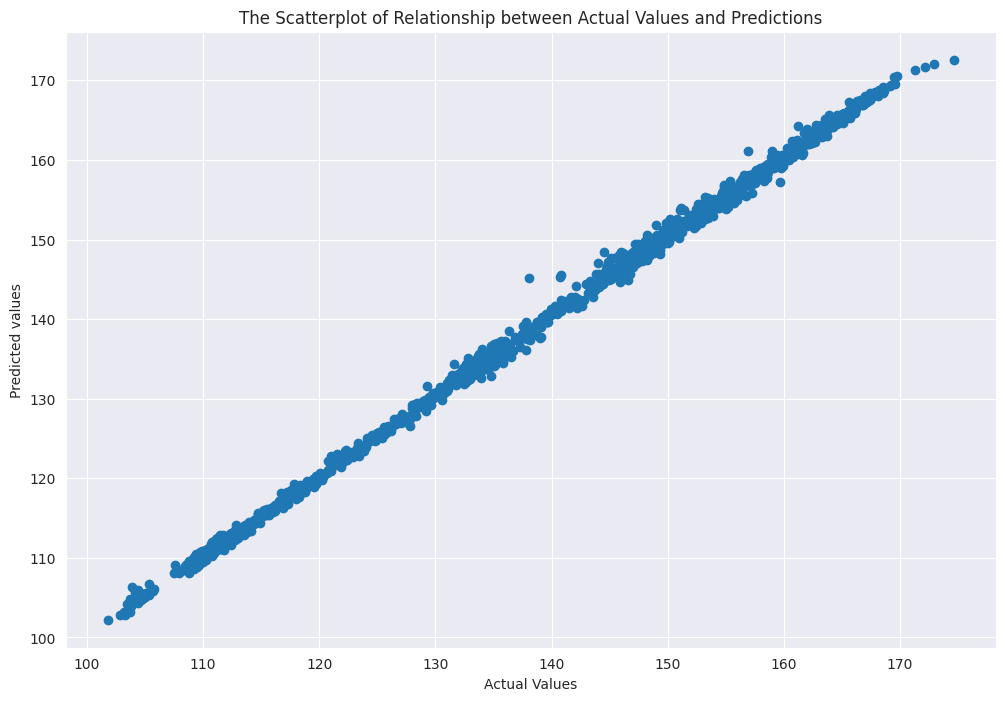

In [119]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [120]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict_test))
print ("MSE:",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE: 0.5105074414801093
MSE: 0.46149852800974434
RMSE: 0.6793368295696505


In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled)
print('R2_score (train): ',r2_score(y_train, y_predict_train))
print('R2_score (test): ',r2_score(y_test, y_predict_test))

376/376 [==============================] - 1s 1ms/step
R2_score (train):  0.9987532403100786
R2_score (test):  0.9981568783394112


In [122]:
print('This shows our model predict % {} of the target correctly'.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2)))

This shows our model predict % 99.88 of the target correctly


<Axes: ylabel='Density'>

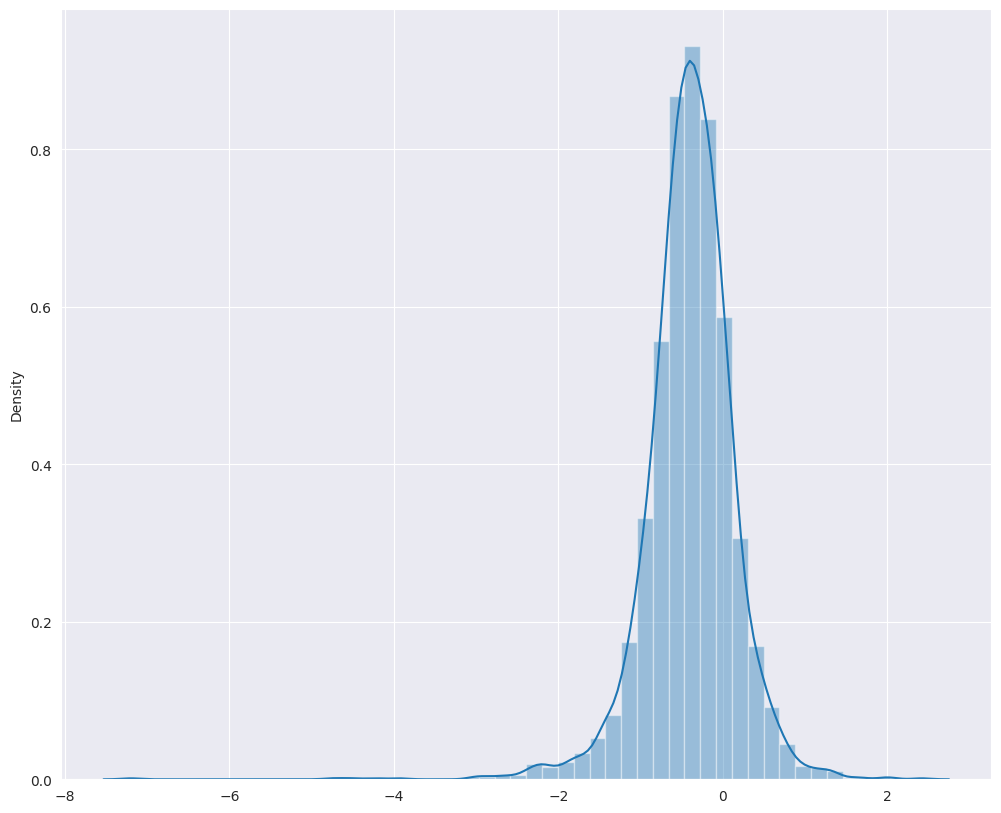

In [123]:
plt.figure(figsize=(12,10))
sns.distplot(y_test-y_predict_test,bins=50)

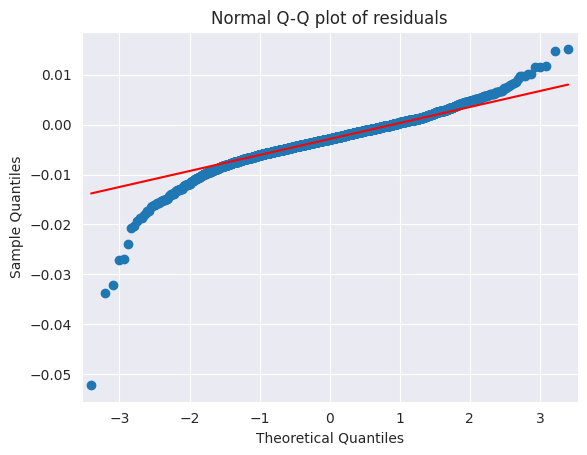

In [124]:
import statsmodels.api as smf
smf.qqplot(predictions_df['Error'], line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()